<a href="https://colab.research.google.com/github/VenuGopal1899/Deep-Learning-Projects/blob/main/2_Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Use the below code snippet to decode the review in train_data

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

print('decoded_review' , decoded_review)

decoded_review ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have don

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_object = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history_object.history

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5871 - accuracy: 0.7087 - val_loss: 0.3924 - val_accuracy: 0.8603
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3293 - accuracy: 0.8995 - val_loss: 0.3092 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2321 - accuracy: 0.9270 - val_loss: 0.3024 - val_accuracy: 0.8770
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1848 - accuracy: 0.9424 - val_loss: 0.2785 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1482 - accuracy: 0.9557 - val_loss: 0.2911 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1212 - accuracy: 0.9635 - val_loss: 0.2856 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1044 - accuracy: 0.9713 - val_loss: 0.3002 - val_accuracy: 0.8830
Epoch 8/20
30

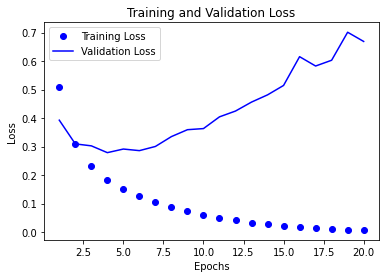

In [ ]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

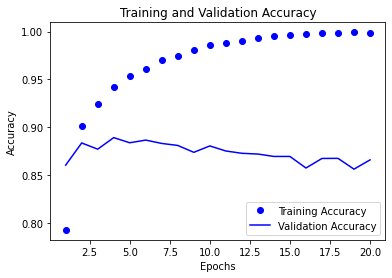

In [ ]:
import matplotlib.pyplot as plt

acc_values = history_dict['accuracy']
accuracy = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Kind of Naive approach based on graph - Accuracy 88% 

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=4, batch_size=512)

results = model2.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.5593 - accuracy: 0.7298
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2713 - accuracy: 0.9083
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2068 - accuracy: 0.9282
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2923 - accuracy: 0.8848
[0.2922605574131012, 0.8848400115966797]


A higher degree of accuracy can be achieved by using a better training algorithm. (Upto 95%)

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(32, activation='relu', input_shape=(10000, )))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=4, batch_size=512)

results = model3.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5194 - accuracy: 0.7443
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2357 - accuracy: 0.9157
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1819 - accuracy: 0.9353
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3198 - accuracy: 0.8792
[0.3197533190250397, 0.8792399764060974]
